## <u> Regularized Mutlinomial Logistic Regression</u> - Built from Scratch 

### Dataset Used : [Iris Data](https://archive.ics.uci.edu/ml/datasets/iris)
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Basic Data Analysis and Exploration

In [110]:
df1 = pd.read_csv('iris.data', sep=',', names=['sepal length in cm',
                                               'sepal width in cm',
                                               'petal length in cm',
                                               'petal width in cm',
                                               'class'] )

df1.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [112]:
df1['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [113]:
df1.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


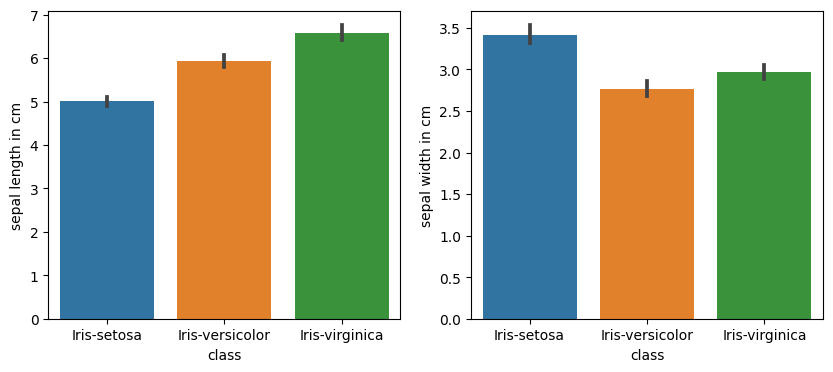

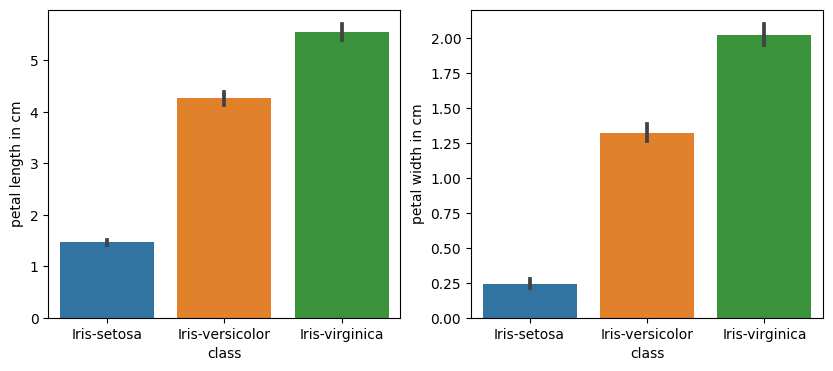

In [114]:
list_of_columns = df1.columns
i=0
while i < (len(list_of_columns)/2):
    fig = plt.figure(figsize=[10,4],dpi=100)
   
 
    plt.subplot(1,2,1)
    sns.barplot(x='class',y = list_of_columns[i], data=df1)
    i += 1
    
    plt.subplot(1,2,2)
    sns.barplot(x='class',y = list_of_columns[i], data=df1)
    i += 1
    
    plt.show()

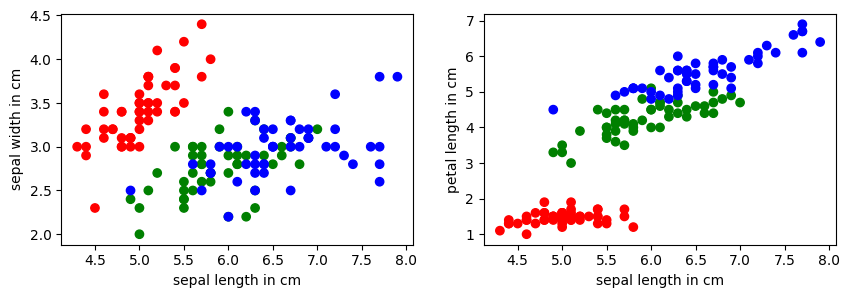

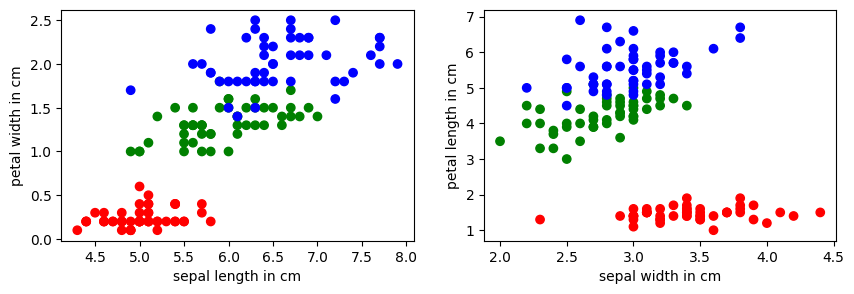

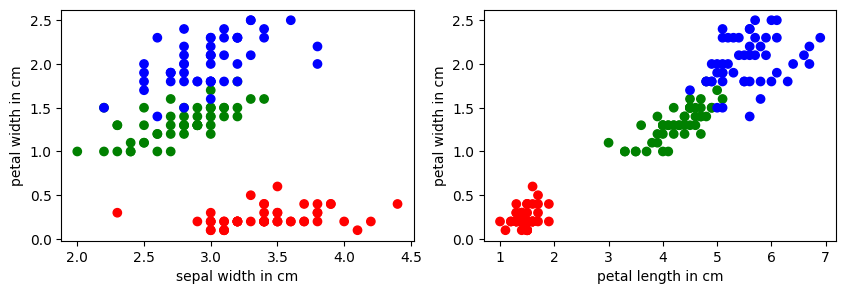

In [115]:
list_of_columns = df1.columns[:-1]
list_of_columns
class_to_colour = df1['class'].apply(lambda x : 'red' if x == 'Iris-setosa'  
                                                 else ('green' if x == 'Iris-versicolor'
                                                               else'blue'))
count = 0 
for i in range(len(list_of_columns)) :
    for j in range(len(list_of_columns)) : 
        if i != j and j>i: 
             
            if count%2 == 0 : 
                fig = plt.figure(figsize=[10,3])
            
            plt.subplot(1,2,count%2 + 1)
            plt.scatter(df1[list_of_columns[i]],
                        df1[list_of_columns[j]], 
                        c=class_to_colour)
            plt.xlabel(list_of_columns[i])
            plt.ylabel(list_of_columns[j])
            
            count+=1
plt.show()       

### Data Splitting and Creating Dummy variables (a.k.a. One hot encoding)

In [116]:
df2 = df1.drop('class',axis='columns')
df2_y = df1['class'].iloc[df2.index]
df2.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [117]:
df2_y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [118]:
X_train, X_dev, X_test = np.split(df2.sample(frac=1), 
                                  [int(.6*len(df2)), int(.8*len(df2))])

In [119]:
X_train.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
87,6.3,2.3,4.4,1.3
78,6.0,2.9,4.5,1.5
115,6.4,3.2,5.3,2.3
142,5.8,2.7,5.1,1.9
26,5.0,3.4,1.6,0.4


In [120]:
X_train.shape

(90, 4)

In [121]:
Y_train = df2_y[X_train.index]
Y_dev = df2_y[X_dev.index]
Y_test = df2_y[X_test.index]

In [122]:
Y_train.head()

87     Iris-versicolor
78     Iris-versicolor
115     Iris-virginica
142     Iris-virginica
26         Iris-setosa
Name: class, dtype: object

### Model Building - From Scratch

In [123]:
def feature_Normalize(X , list_of_features):
    
    X_norm = X.copy()
    mu_dict = {}
    std_dict = {}
    
    for i in list_of_features : 
        mu = np.mean(X_norm[i])
        std = np.std(X_norm[i])
        X_norm[i] = (X_norm[i] - mu)/std
        mu_dict[i] = mu
        std_dict[i] = std
    
    return X_norm, mu_dict, std_dict

In [124]:
X_train_norm,mu,std = feature_Normalize(X_train,X_train.columns)
X_train_norm.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
87,0.526889,-1.661280,0.291516,0.065972
78,0.165823,-0.239582,0.350875,0.335857
115,0.647244,0.471266,0.825743,1.415396
142,-0.074888,-0.713482,0.707026,0.875626
26,-1.037730,0.945166,-1.370522,-1.148510


In [125]:
Y_train_dum = pd.get_dummies(Y_train)
Y_train_dum.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
87,0,1,0
78,0,1,0
115,0,0,1
142,0,0,1
26,1,0,0


In [126]:
def initialiaze_weights(X,Y):
    # no. of featurs x no. of classes - Initialize to array of zeros
    W = np.zeros((X.shape[1],Y.shape[1])) # 4x3

    # 1 x no.of classes - Initialize to array of zeros
    # bias term for each class
    b = np.zeros((1,Y.shape[1])) # 1x3
    return W, b 

In [127]:
W,b = initialiaze_weights(X_train_norm,Y_train_dum) 
W.shape

(4, 3)

#### Cost Function for Regularized Logistic Regression (L2 Regularization)

$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =   y^{(i)} (- \log(a^{(i)})) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$




$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{4} + \frac{\lambda}{2m} \sum_{j=1}^n W^2$$ 


In [128]:
def sigmoid(z) : return 1/(1 + np.exp(-z))

In [129]:
def compute_cost(X,Y,W,b,lambda_=0):
    
    m = Y.shape[0] # 90 - no of training examples we have 
    
    
    Z = np.dot(X,W) + b #90x4 - 4x3 = 90x3 + 1x3 , so by broadcasting = 90x3
    A = sigmoid(Z) # 90x3 -- prediction for each example for each class
    
    J = (1/m) * np.sum( Y * - np.log(A) - (1 - Y) * np.log(1 - A)) + \
                (lambda_/(2*m)) * np.sum(np.square(W)) #L2 regularization
                    
    return J.item(), A

In [130]:
J,A = compute_cost(X_train.to_numpy(),Y_train_dum.to_numpy(),W,b,lambda_=1)
J
#print(A.shape)

2.0794415416798357

#### Gradient of the Cost Function

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{5} + \frac{\lambda}{2m} \sum W$$

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum (A - Y)\tag{6}$$

In [131]:
def gradient_descent(X,Y,alpha=0.1,num_iters=100,lambda_=0):
    
    m = Y.shape[0] # 90
    W,b = initialiaze_weights(X,Y)  # 4x3
    J_history = []
    
    for i in range(num_iters): 
        
        J, A = compute_cost(X,Y,W,b,lambda_) 
                                                        #grad_W =  4x90 - 90x3 = 4x3 
        grad_W = (1/m) * np.dot(X.T,(A - Y)) + \
                 (lambda_/(2*m)) * np.sum(np.square(W)) #L2 regulazation
        
        grad_b = (1/m) * np.sum(A - Y,axis=0, keepdims=True) # 1x3
        
        W = W - alpha * grad_W
        b = b - alpha * grad_b 
        
        J_history.append(J)
    
    return J_history,W,b

In [132]:
c,W_opti,b_opti = gradient_descent(X_train_norm.to_numpy(),
                                   Y_train_dum.to_numpy(),
                                   alpha=0.1,
                                   num_iters=1000,
                                   lambda_=0.1)

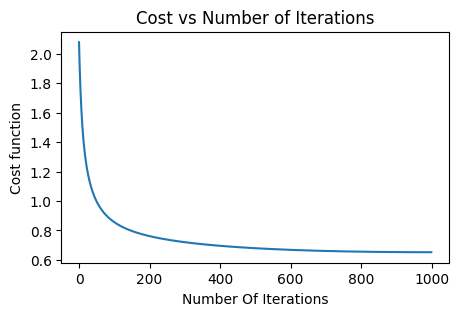

In [133]:
plt.figure(figsize=[5,3],dpi=100)
plt.plot(range(1000),c)
plt.title('Cost vs Number of Iterations')
plt.xlabel('Number Of Iterations')
plt.ylabel('Cost function')
plt.show()

### Combined all the functions and created a Class for the Model
#### Please click [here](My_logistic_regression_model.py) to see the Class (Code for the Model)

In [134]:
from My_logistic_regression_model import My_Logistic_Regression

In [135]:
model = My_Logistic_Regression()
model.fit(X_train,Y_train_dum,normalize=True)

In [136]:
model.accuracy

'91.11%'

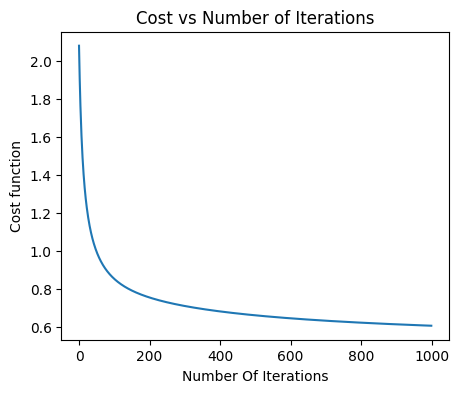

In [137]:
model.plot_cost()

In [138]:
model.cost[-1]

0.6062808999080959

#### Using the Model on Dev Set

In [139]:
Y_hat_dev = model.predict(X_dev)
Y_hat_dev.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
108,0,0,1
82,0,1,0
92,0,1,0
146,0,0,1
140,0,0,1


In [140]:
model.get_linear_cost(Y_hat_dev,pd.get_dummies(Y_dev))

0.16666666666666666

In [141]:
model.get_accuracy(Y_hat_dev.idxmax(axis=1), Y_dev)

'83.33%'

### Hyperparameter Tuning for Lambda($\lambda$)

In [142]:
Model_Selection = pd.DataFrame(columns=['Model','lambda','Accuracy_train','Accuracy_dev',
                                        'Cost_Train', 'Cost_Dev'])

i=1
for lambda_i in np.arange(0,2.2,0.2):
    
    model = My_Logistic_Regression()
    model.fit(X_train,Y_train_dum,normalize=True,lambda_=lambda_i)
    
    
    Y_hat_train = model.predict(X_train)
    Y_hat_dev = model.predict(X_dev)
    
    dev_cost = model.get_linear_cost(Y_hat_dev,pd.get_dummies(Y_dev))
    
    train_acc = model.get_accuracy(Y_hat_train.idxmax(axis=1), Y_train)
    dev_acc = model.get_accuracy(Y_hat_dev.idxmax(axis=1), Y_dev)
    
    Model_Selection = Model_Selection.append({'Model': 'Model ' + str(i),
                                             'lambda': lambda_i,
                                             'Accuracy_train' : train_acc,
                                             'Accuracy_dev' : dev_acc,
                                             'Cost_Train' : model.cost[-1],
                                             'Cost_Dev' : dev_cost
                                              }, 
                                              ignore_index=True)
    i+=1

Model_Selection

,Model,lambda,Accuracy_train,Accuracy_dev,Cost_Train,Cost_Dev
0,Model 1,0.0,91.11%,83.33%,0.606281,0.166667
1,Model 2,0.2,91.11%,83.33%,0.647532,0.166667
2,Model 3,0.4,91.11%,83.33%,0.681645,0.166667
3,Model 4,0.6,91.11%,83.33%,0.710712,0.166667
4,Model 5,0.8,91.11%,83.33%,0.736037,0.166667
5,Model 6,1.0,91.11%,80.0%,0.758480,0.200000
6,Model 7,1.2,91.11%,76.67%,0.778640,0.233333
7,Model 8,1.4,91.11%,76.67%,0.796947,0.233333
8,Model 9,1.6,91.11%,76.67%,0.813726,0.233333
9,Model 10,1.8,91.11%,76.67%,0.829222,0.233333


### Using our best Model on Test Set

In [143]:
Y_hat_test = model.predict(X_test)

Accuracy:  86.67%


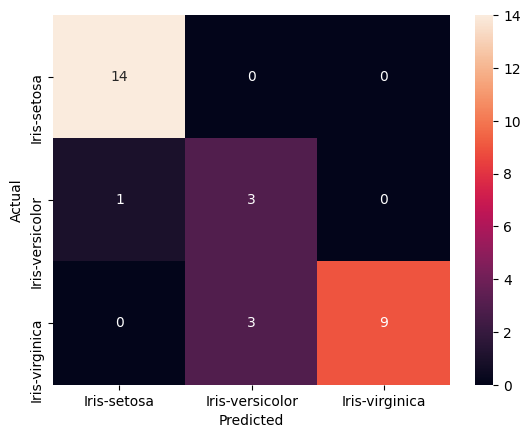

In [144]:
confusion_matrix = pd.crosstab(Y_hat_test.idxmax(axis=1), Y_test,
                               rownames=['Actual'], 
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',model.get_accuracy(Y_hat_test.idxmax(axis=1), Y_test))
plt.show()